# Redes Neuronales

- Cargar liberías
- Cargar o generar datos del XOR
- Dividir datos en entrenaniento y prueba
- Entrenar una red neuronal para el XOR
    - medir error
- Visualizar dónde estan las barreras de decisión encontradas (no analíticamente)
- Cargar datos de círculo
    - visualizar
- Dividir datos en entrenamiento y prueba
- Diseñar red para clasificar datos dentro y fuera del círculo
    - visualizar
- Talvez crear red convolucional y probar MINST

In [246]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from random import random, uniform

In [3]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
y=np.asarray([0,1,1,0])


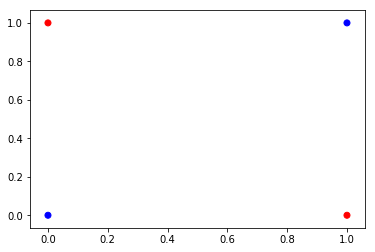

In [14]:
plt.scatter(X[:,0],X[:,1],c=['r' if res==1 else 'b' for res in y])

In [91]:
model=MLPClassifier( hidden_layer_sizes=(4),max_iter=2000000)

In [92]:
model.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [122]:
def accuracy(X,y):
    errores=0
    for modelo,realidad in zip(model.predict(X),y):
        errores+=abs(modelo-realidad)
    return 100*errores/len(y)

In [123]:
accuracy(X,y)

50

In [107]:
model.predict_proba(X)

array([[0.87462869, 0.12537131],
       [0.07716816, 0.92283184],
       [0.23312066, 0.76687934],
       [0.91021727, 0.08978273]])

In [108]:
X_test=np.asarray([[random(),random()] for i in range(10000) ])

In [109]:
y_test=model.predict(X_test)

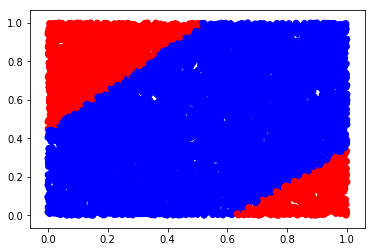

In [110]:
plt.scatter(X_test[:,0],X_test[:,1],c=['r' if res==1 else 'b' for res in y_test])

# El circulo

In [201]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/circulo.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['class'], test_size=0.25)

In [240]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [301]:
X_train=[[uniform(-1,1),uniform(-1,1)] for i in range(10000)]

In [302]:
y_train=[ 1 if c1**2 + c2**2 <= 1 else 0 for c1,c2 in X_train]

In [303]:
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)


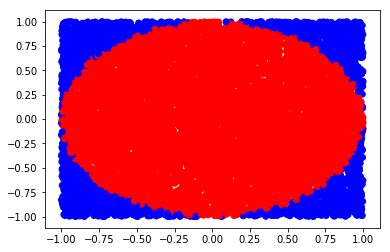

In [304]:
plt.scatter(X_train[:,0],X_train[:,1],c=['r' if res==1 else 'b' for res in y_train])

In [305]:
model=MLPClassifier( hidden_layer_sizes=(10))

In [306]:
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [307]:
accuracy(X_train,y_train)

2

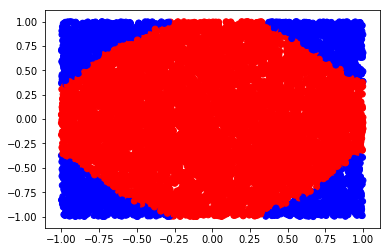

In [308]:
plt.scatter(X_train[:,0],X_train[:,1],c=['r' if res==1 else 'b' for res in model.predict(X_train)])

# datos de prueba

In [309]:
X_test=[[uniform(-1,1),uniform(-1,1)] for i in range(10000)]
y_test=[ 1 if c1**2 + c2**2 <= 1 else 0 for c1,c2 in X_test]
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

In [314]:
accuracy(X_test,y_test)

2

In [315]:
salida=model.predict(X_test)
datos_malos=[]
for x,y,s in zip(X_test,y_test,salida):
    if y!=s:
        datos_malos.append(x)
datos_malos=np.asarray(datos_malos)

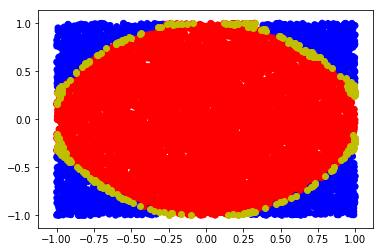

In [316]:
plt.scatter(X_test[:,0],X_test[:,1],c=['r' if res==1 else 'b' for res in model.predict(X_test)])
plt.scatter(datos_malos[:,0],datos_malos[:,1],c='y')

In [322]:
from sklearn.svm import SVC

In [336]:
model=SVC(C=10)

In [337]:
model.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [338]:
accuracy(X_train,y_train)

0

In [340]:
salida=model.predict(X_test)
datos_malos=[]
for x,y,s in zip(X_test,y_test,salida):
    if y!=s:
        datos_malos.append(x)
datos_malos=np.asarray(datos_malos)

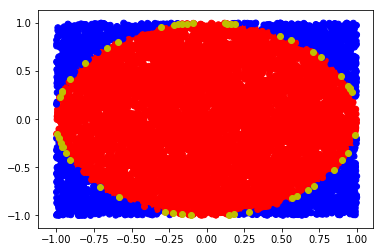

In [341]:
plt.scatter(X_test[:,0],X_test[:,1],c=['r' if res==1 else 'b' for res in model.predict(X_test)])
plt.scatter(datos_malos[:,0],datos_malos[:,1],c='y')

In [342]:
model.n_support_

array([338, 337], dtype=int32)